In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

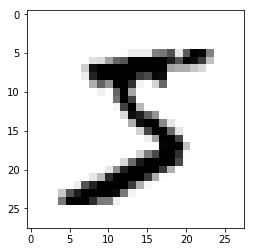

5


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

print(y_train[0])    

In [3]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

print(x_train[0])

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [4]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/3
60000/60000 [==============================] - 42s 704us/sample - loss: 0.2593 - acc: 0.9252 - l - ETA: 2s - loss: 
Epoch 2/3
60000/60000 [==============================] - 22s 369us/sample - loss: 0.1063 - acc: 0.9675
Epoch 3/3
60000/60000 [==============================] - 26s 426us/sample - loss: 0.0728 - acc: 0.9770


In [5]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

10000/10000 [==============================] - 4s 365us/sample - loss: 0.0902 - acc: 0.9728
0.09023767396658659
0.9728


In [7]:
model.save('kerasNN.model')
new_model = tf.keras.models.load_model('kerasNN.model')
predictions = new_model.predict(x_test)
print(predictions)

[[5.68426284e-09 9.68556492e-07 4.65903122e-06 ... 9.99970317e-01
  3.76186222e-07 1.53049632e-06]
 [1.76718711e-08 1.31145744e-02 9.86853957e-01 ... 2.33791965e-07
  1.58079888e-06 2.20639722e-11]
 [1.61335976e-08 9.99948382e-01 4.10737175e-06 ... 2.50446647e-05
  1.10326864e-05 1.07850205e-07]
 ...
 [8.63646710e-10 1.42488068e-06 3.15693356e-08 ... 8.83508983e-06
  1.02318074e-06 1.48424733e-05]
 [1.85945055e-07 6.29606973e-07 5.16915435e-08 ... 2.29082957e-06
  2.84194393e-04 4.93774587e-06]
 [5.55245549e-07 9.25553110e-08 1.90178241e-06 ... 1.36764988e-10
  3.11984508e-07 1.97171324e-09]]


7


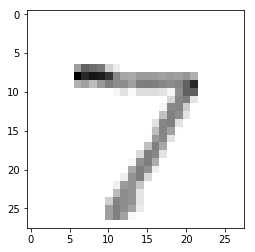

In [8]:
import numpy as np
print(np.argmax(predictions[0]))
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()